<a href="https://colab.research.google.com/github/bilaslsa/PRAKTIKUM_MACHINE_LEARNING_SEMESTER3/blob/main/Praktikum_Mandiri07Praktikum07_Mandiri.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [39]:
# Import library
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.api as sm
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVR
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [40]:
# Menghubungkan Colab dengan Google Drive
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [41]:
# Memanggil data set lewat gdrivess
path = "/content/gdrive/MyDrive/Pertemuan07_Mandiri"

In [42]:
# Membaca file csv menggunakan pandas
import pandas as pd
df = pd.read_csv(path + '/data/dataset_satelit.csv')
display(df.head())

,No,Longitude,Lattitude,N,P,K,Ca,Mg,Fe,Mn,...,b1,Sigma_VV,Sigma_VH,plia,lia,iafe,gamma0_vv,gamma0_vh,beta0_vv,beta0_vh
0,1,103.036658,-0.604417,2.64,0.15,0.415,0.51,0.31,119.96,463.23,...,0.0433,0.18183,0.04461,35.74446,35.79744,35.41161,0.22331,0.05479,0.31325,0.07686
1,2,103.037201,-0.604689,2.75,0.17,0.568,0.76,0.58,102.63,493.81,...,0.0465,0.22079,0.04640,35.12096,35.14591,35.41510,0.27116,0.05699,0.38033,0.07993
2,3,103.036359,-0.603012,1.77,0.12,0.339,0.49,0.6,107.37,460.93,...,0.0417,0.18926,0.03992,35.07724,35.07730,35.41135,0.23242,0.04902,0.32604,0.06876
3,4,103.036950,-0.603219,2.30,0.15,0.460,0.74,0.67,96.02,338.17,...,0.0367,0.14769,0.03622,36.08078,36.08469,35.41583,0.18138,0.04448,0.25440,0.06238
4,5,103.036802,-0.601969,2.05,0.14,0.308,0.64,0.72,87.01,384.33,...,0.0361,0.18205,0.03797,32.68855,32.69293,35.41592,0.22359,0.04664,0.31359,0.06541


In [43]:
# Mencari informasi umum pada data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 594 entries, 0 to 593
Data columns (total 34 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   No         594 non-null    int64  
 1   Longitude  594 non-null    float64
 2   Lattitude  594 non-null    float64
 3   N          594 non-null    float64
 4   P          594 non-null    float64
 5   K          593 non-null    float64
 6   Ca         594 non-null    float64
 7   Mg         594 non-null    object 
 8   Fe         594 non-null    float64
 9   Mn         594 non-null    float64
 10  Cu         594 non-null    float64
 11  Zn         594 non-null    float64
 12  B          594 non-null    float64
 13  b12        594 non-null    float64
 14  b11        594 non-null    float64
 15  b9         594 non-null    float64
 16  b8a        594 non-null    float64
 17  b8         594 non-null    float64
 18  b7         594 non-null    float64
 19  b6         594 non-null    float64
 20  b5        

In [44]:
# Statistik Deskriptif
df.describe()

,No,Longitude,Lattitude,N,P,K,Ca,Fe,Mn,Cu,...,b1,Sigma_VV,Sigma_VH,plia,lia,iafe,gamma0_vv,gamma0_vh,beta0_vv,beta0_vh
count,594.000000,594.000000,594.000000,594.000000,594.000000,593.000000,594.000000,594.000000,594.000000,594.000000,...,594.000000,594.000000,594.000000,594.000000,594.000000,594.000000,594.000000,594.000000,594.000000,594.000000
mean,297.500000,106.878644,-1.024933,2.259091,0.141380,0.582175,0.595094,74.613771,308.034697,2.391195,...,0.177291,0.234474,0.102789,28.640422,28.664891,28.609569,0.202587,0.051524,0.269642,0.062320
std,171.617307,4.949840,0.965349,0.395499,0.019782,0.222567,0.366118,55.579655,241.731643,1.580296,...,0.155615,0.070516,0.112310,15.325347,15.380384,15.329170,0.104357,0.012959,0.143728,0.024218
min,1.000000,102.760857,-2.333750,1.140000,0.090000,0.122000,0.050000,21.080000,3.160000,0.090000,...,0.014100,0.115170,0.021460,0.127000,0.098600,0.026000,0.008700,0.016900,0.009300,0.016300
25%,149.250000,102.927811,-2.233338,1.982500,0.130000,0.429000,0.320000,40.705000,124.015000,1.172500,...,0.046925,0.183210,0.039535,31.959745,31.968948,33.685353,0.183085,0.040250,0.244935,0.052772
50%,297.500000,103.581969,-0.602276,2.280000,0.140000,0.549000,0.540000,65.650000,239.445000,2.225000,...,0.072700,0.213385,0.046550,35.067930,35.110415,34.611565,0.233590,0.050415,0.310380,0.068380
75%,445.750000,113.403797,-0.257349,2.570000,0.150000,0.710000,0.790000,87.372500,434.990000,3.357500,...,0.318900,0.262242,0.059190,38.319135,38.441065,39.002760,0.271790,0.060410,0.364505,0.079020
max,594.000000,113.434700,0.069251,3.230000,0.220000,1.489000,2.820000,559.100000,2009.320000,8.170000,...,0.751400,0.512210,0.373000,47.592900,48.014640,39.209330,0.658960,0.122300,0.814170,0.150620


In [45]:
# Pemilihan fitur dan kolom drops
columns_to_keep = ['P', 'iafe', 'lia', 'plia', 'gamma0_vh', 'N']
df_cleaned = df[columns_to_keep]
display(df_cleaned.head())

,P,iafe,lia,plia,gamma0_vh,N
0,0.15,35.41161,35.79744,35.74446,0.05479,2.64
1,0.17,35.41510,35.14591,35.12096,0.05699,2.75
2,0.12,35.41135,35.07730,35.07724,0.04902,1.77
3,0.15,35.41583,36.08469,36.08078,0.04448,2.30
4,0.14,35.41592,32.69293,32.68855,0.04664,2.05


In [46]:
# Variabel (Y)
y = df_cleaned['N']
# Variabel (X)
X = df_cleaned.drop('N', axis=1)

In [47]:
y.head()

,N
0,2.64
1,2.75
2,1.77
3,2.30
4,2.05


In [48]:
X.head()

,P,iafe,lia,plia,gamma0_vh
0,0.15,35.41161,35.79744,35.74446,0.05479
1,0.17,35.41510,35.14591,35.12096,0.05699
2,0.12,35.41135,35.07730,35.07724,0.04902
3,0.15,35.41583,36.08469,36.08078,0.04448
4,0.14,35.41592,32.69293,32.68855,0.04664


In [49]:
# Membagi dataset untuk training dan test
X_train, X_test, y_train, y_test = train_test_split(
X, y, test_size=0.2, random_state=7

)

In [50]:
# Training model
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [51]:
# Evaluasi model
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

y_pred = model.predict(X_test)
r2 = r2_score(y_test, y_pred)

In [52]:
# Pemodelan
import statsmodels.api as sm

# Add a constant to the training data
X_train_const = sm.add_constant(X_train)

# Buat model OLS
model = sm.OLS(y_train, X_train_const).fit()
print("Model Summary:")
print(model.summary())
print('Model Parameters:')
print(model.params)



Model Summary:
                            OLS Regression Results                            
Dep. Variable:                      N   R-squared:                       0.600
Model:                            OLS   Adj. R-squared:                  0.596
Method:                 Least Squares   F-statistic:                     140.7
Date:                Fri, 07 Nov 2025   Prob (F-statistic):           6.00e-91
Time:                        09:13:14   Log-Likelihood:                -10.559
No. Observations:                 475   AIC:                             33.12
Df Residuals:                     469   BIC:                             58.10
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          1.5143      0.112     

In [53]:
# Pengujian model dengan data testing
X_test_const = sm.add_constant(X_test)
y_pred = model.predict(X_test_const)

# Evaluasi model dengan metrik R-squared, MAE, dan MSE
r2 = r2_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse) # Calculate RMSE

print(f"R-squared on test set: {r2:.4f}")
print(f"Mean Absolute Error (MAE) on test set: {mae:.4f}")
print(f"Mean Squared Error (MSE) on test set: {mse:.4f}")
print(f"Root Mean Squared Error (RMSE) on test set: {rmse:.4f}")

R-squared on test set: 0.6657
Mean Absolute Error (MAE) on test set: 0.1866
Mean Squared Error (MSE) on test set: 0.0560
Root Mean Squared Error (RMSE) on test set: 0.2366


In [54]:
# Analisis Korelasi
correlation_matrix = df_cleaned.corr()
print(correlation_matrix)

                  P      iafe       lia      plia  gamma0_vh         N
P          1.000000 -0.309884 -0.305155 -0.305410  -0.307552  0.643212
iafe      -0.309884  1.000000  0.992763  0.992756   0.587518 -0.593590
lia       -0.305155  0.992763  1.000000  0.999972   0.579967 -0.593177
plia      -0.305410  0.992756  0.999972  1.000000   0.580114 -0.592965
gamma0_vh -0.307552  0.587518  0.579967  0.580114   1.000000 -0.540866
N          0.643212 -0.593590 -0.593177 -0.592965  -0.540866  1.000000


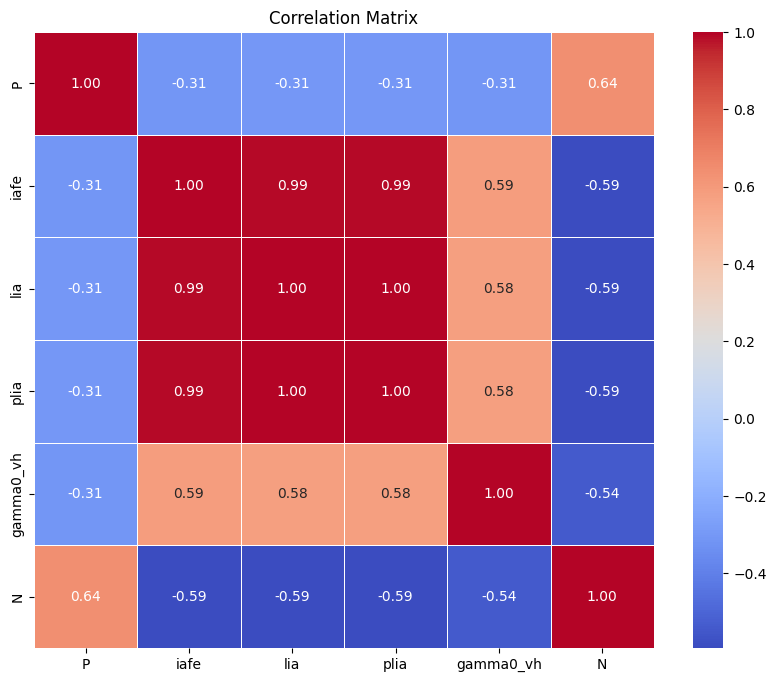

In [55]:
# Visualisasi Korelasi menggunakan Heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Correlation Matrix')
plt.show()

In [56]:
# Pengujian model dengan data testing
# Tambahkan konstanta ke data uji
X_test_const = sm.add_constant(X_test)

# Prediksi nilai N
y_pred_test = model.predict(X_test_const)

# Buat tabel hasil prediksi
hasil = pd.DataFrame({
    "P": X_test["P"].to_numpy(),
    "iafe": X_test["iafe"].to_numpy(),
    "lia": X_test["lia"].to_numpy(),
    "plia": X_test["plia"].to_numpy(),
    "gamma0_vh": X_test["gamma0_vh"].to_numpy(),
    "Aktual N": y_test.to_numpy(),
    "Prediksi N": y_pred_test
})

# 1) Selisih error (positif = overpredict)
hasil["Selisih error"] = hasil["Prediksi N"] - hasil["Aktual N"]

# 2) Akurasi per-baris (100 * (1 - |error|/aktual)), dibatasi 0-100
denom = hasil["Aktual N"].replace(0, np.nan) # antisipasi pembagi nol
hasil["Akurasi (%)"] = (1 - (hasil["Selisih error"].abs() / denom)).clip(lower=0, upper=1) * 100

hasil.head()

,P,iafe,lia,plia,gamma0_vh,Aktual N,Prediksi N,Selisih error,Akurasi (%)
480,0.15,0.06870,0.23710,0.30750,0.04230,2.84,2.624201,-0.215799,92.401429
544,0.15,0.06030,0.26640,0.36450,0.03570,2.85,2.673911,-0.176089,93.821432
540,0.14,0.06340,0.26340,0.35250,0.03490,2.93,2.585447,-0.344553,88.240496
459,0.12,39.02394,37.93454,37.93401,0.04957,1.60,2.013099,0.413099,74.181321
539,0.16,0.06710,0.26390,0.34950,0.03400,3.03,2.774562,-0.255438,91.569716
